In [22]:
pip install opencv-python

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Facial Recognititon Using Principal Component Analysis

* Importing the Libraries

In [73]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from IPython import display

* Training Phase

In [74]:
os.getcwd() # Current working directory

'/Users/ira/Documents/GitHub/ML-Project'

In [75]:
# Function for loading the images
def load_images(folder):
    dir_list = []
    for filename in os.listdir(folder):
        dir_list.append(filename)
    return dir_list

In [76]:
# Initialize the variables
full_data= load_images("Full Data") # Getting the full image dataset
image_width = 128
image_length = 128
total_pixels = image_width*image_length
total_images = 1280

In [77]:
# Convert the face images to face vectors
def image_to_vectors(data):
    face_vector = []
    for j in data:
        face_image = cv2.cvtColor(cv2.imread("Full Data/"+str(j)), cv2.COLOR_RGB2GRAY)
        face_image = cv2.resize(face_image, (image_width, image_length))
        face_image = face_image.reshape(total_pixels,)
        face_vector.append(face_image)
    face_vector = np.asarray(face_vector)
    face_vector = face_vector.transpose()
    return face_vector

In [78]:
face_vector=image_to_vectors(full_data)
print("Face Vectors")
print(face_vector)

Face Vectors
[[130 120  50 ... 232 252  28]
 [ 85 120  46 ... 235 252  28]
 [131 120  36 ... 237 252  27]
 ...
 [ 23  42  92 ... 130 130  23]
 [ 17  55  82 ... 117 137  23]
 [ 12  65  33 ... 106 142  24]]


In [79]:
# Displaying the mean face 
def mean_face(data):
    average_face_vector = np.mean(face_vector,axis=1)
    plt.imshow(average_face_vector.reshape(image_width,image_length),cmap='gray')
    plt.title('Mean Face')

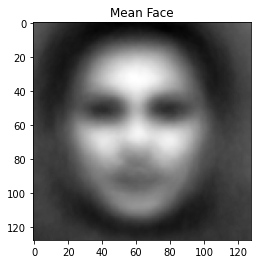

In [80]:
mean_face(full_data)

In [81]:
# Getting the average face vector
def avg_vector(data):
    avg_face_vector = np.mean(face_vector,axis=1)
    avg_face_vector = avg_face_vector.reshape(face_vector.shape[0], 1)
    return avg_face_vector

In [82]:
avg_face_vector=avg_vector(full_data)
print("Average Face Vector")
print(avg_face_vector)

Average Face Vector
[[107.42109375]
 [106.87890625]
 [106.2875    ]
 ...
 [ 96.80703125]
 [ 97.49921875]
 [ 97.9546875 ]]


In [83]:
# Normalize the face vectors by subtracting the average face vector from each face vector
def normalization(data):
    normalized_face_vector = face_vector - avg_face_vector
    return normalized_face_vector

In [84]:
normalized_face_vector=normalization(full_data)
print("Normalized Face Vector")
print(normalized_face_vector)

Normalized Face Vector
[[ 22.57890625  12.57890625 -57.42109375 ... 124.57890625 144.57890625
  -79.42109375]
 [-21.87890625  13.12109375 -60.87890625 ... 128.12109375 145.12109375
  -78.87890625]
 [ 24.7125      13.7125     -70.2875     ... 130.7125     145.7125
  -79.2875    ]
 ...
 [-73.80703125 -54.80703125  -4.80703125 ...  33.19296875  33.19296875
  -73.80703125]
 [-80.49921875 -42.49921875 -15.49921875 ...  19.50078125  39.50078125
  -74.49921875]
 [-85.9546875  -32.9546875  -64.9546875  ...   8.0453125   44.0453125
  -73.9546875 ]]


In [85]:
# Calculate the Covariance Matrix or the Sigma
def covar_matrix(data):
    covariance_matrix = np.cov(np.transpose(normalized_face_vector))
    return covariance_matrix

In [86]:
covariance_matrix=covar_matrix(full_data)
print("Covariance Matrix")
print(covariance_matrix)

Covariance Matrix
[[1613.83201956 -105.13400454 -241.48029848 ... 1210.12850307
  -126.20735518  310.2203678 ]
 [-105.13400454 1801.86678478 -144.4114838  ... -820.57455485
   815.76543424  457.90293376]
 [-241.48029848 -144.4114838  3791.47387602 ... -939.79971272
   409.75752595 -602.06725944]
 ...
 [1210.12850307 -820.57455485 -939.79971272 ... 4182.73680434
  -890.83903359  499.53954829]
 [-126.20735518  815.76543424  409.75752595 ... -890.83903359
  3647.12845839 -214.30419854]
 [ 310.2203678   457.90293376 -602.06725944 ...  499.53954829
  -214.30419854 1457.41396183]]


In [87]:
# Calculate Eigen Vectors
def eigen_vec(data):
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    # Select the K best Eigen Faces, K < M
    k = 60
    k_eigen_vectors = eigen_vectors[0:k, :]
    return k_eigen_vectors

Text(0.5, 1.0, 'Sigma data decay')

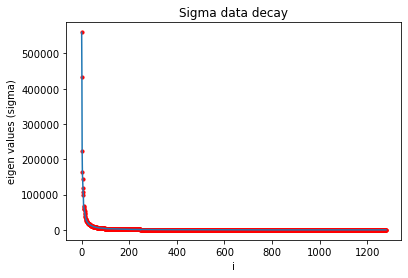

In [88]:
# Plotting sigma vs index of the images
it=[]
eig=[]
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
for i in range (len(eigen_values)):
    it.append(i)
    eig.append(eigen_values[i])
plt.scatter(it,eig, s=10, c='red')
plt.plot(it,eig)
plt.ylabel('eigen values (sigma)')
plt.xlabel('i')
plt.title('Sigma data decay')

In [89]:
# Convert lower dimensionality K Eigen Vectors to Original Dimensionality
def eigen_face(data):
    k_eigen_vectors= eigen_vec(data)
    eigen_faces = k_eigen_vectors.dot(np.transpose(normalized_face_vector))
    return eigen_faces

In [90]:
print("Eigen Faces")
eigen_faces=eigen_face(full_data)
print(eigen_faces)
print("Eigen Faces Shape")
print(eigen_face(full_data).shape)

Eigen Faces
[[ -32.79193535  -52.30626799  -55.4511749  ... -180.10629416
  -199.73791781 -195.7037156 ]
 [ -11.45585911  -12.1187156   -10.76009021 ...  -18.78688332
   -18.30329169    9.24878278]
 [  55.29761762   57.10299375   64.42805853 ...   79.69859937
    64.01653826   28.0539055 ]
 ...
 [  -3.90341616  -17.76073581  -29.1996258  ...   50.58002047
    13.23639738   -7.74896071]
 [ -17.56853029  -13.89247372  -11.72860343 ...   12.35109744
     6.20784149    1.47897308]
 [  43.38966817   40.93606658    8.29029578 ... -130.18302017
  -123.74998656 -113.43417735]]
Eigen Faces Shape
(60, 16384)


In [91]:
# Represent Each eigen face as combination of the K Eigen Vectors
def eigen_weights(data):
    weights = np.transpose(normalized_face_vector).dot(np.transpose(eigen_faces))
    return weights


In [92]:
print("Weights")
weights=eigen_weights(full_data)
print(weights)

Weights
[[  3132841.21743518   3022044.10219967 -35888924.60520095 ...
   -6508008.96304566   8276620.17154187  34322719.91871668]
 [ 14640142.44568182  -6430650.14099745 -13934848.1306266  ...
  -13195998.33526647 -13003472.35226776  23313614.3320304 ]
 [  1757992.83914601  -1875809.41067218  25228839.86410304 ...
    9372878.26298304 -12588599.36662716 -22355588.86089397]
 ...
 [-11597275.7104168    5043002.92106513 -26377577.00624805 ...
   -7869651.23211677  15046968.25385297  18238956.8317485 ]
 [  2974913.73713467    831848.98891321   7724293.29050451 ...
   -1174457.07529196 -18183557.07486173  -4157078.47123937]
 [  3612654.29333343  -6568208.34637779 -24981022.61748958 ...
  -18311009.90074316  -2399526.2911395   26331869.26247945]]


* Testing Phase

In [102]:
# Testing one test image
def test_image(test_add):
    test_img = cv2.imread(test_add)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
    plt.imshow(test_img, cmap='gray')
    test_img= cv2.resize(test_img, (image_width, image_length))
    test_img = test_img.reshape(total_pixels, 1)
    test_normalized_face_vector = test_img - avg_face_vector
    test_weight = np.transpose(test_normalized_face_vector).dot(np.transpose(eigen_faces))
    index =  np.argmin(np.linalg.norm(test_weight - weights, axis=1))
    return full_data[index].split("_")[0]

'Taylor Swift'

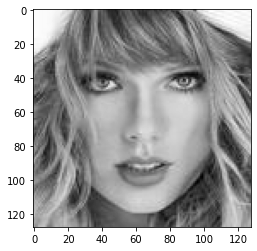

In [106]:
test_image("Full Data/Taylor Swift_0.jpg")

* Face Detection and Recognititon from a collage of images

In [110]:
#FACE DETECTION
# Reading the image
img = cv2.imread('/Users/ira/Documents/GitHub/ML-Project/Collages/Collage_9.jpg')
  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('/Users/ira/Downloads/Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image

faces_rect = haar_cascade.detectMultiScale(gray_img, 1.05, 7)
# Iterating through rectangles of detected faces
#for (x, y, w, h) in faces_rect:
    #cv2.rectangle(img, (x, y), (x+w, y+h), (127, 0, 255), 2)
cv2.imshow('Detected faces', img)
cv2.destroyAllWindows()

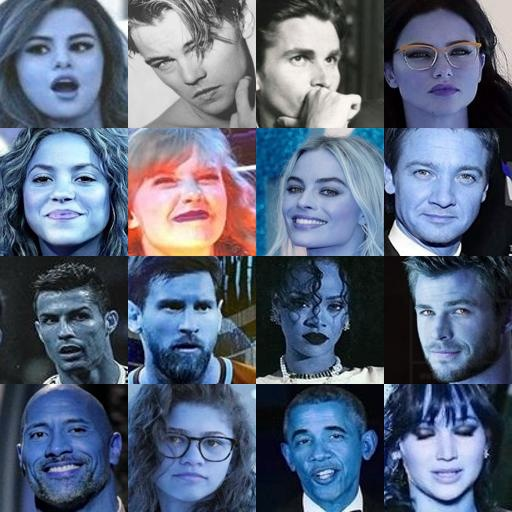

In [111]:
Image.fromarray(img)

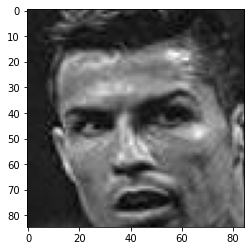

barack obama


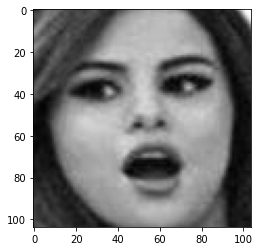

Shakira Isabel Mebarak


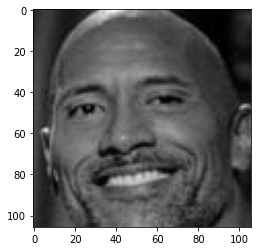

Dwayne Johnson


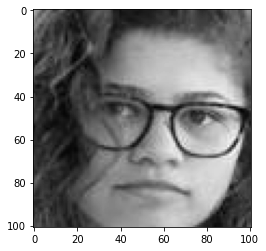

Zendaya


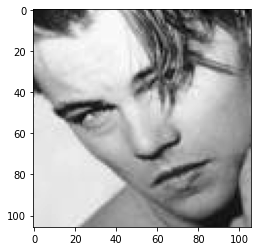

Leonardo DiCaprio


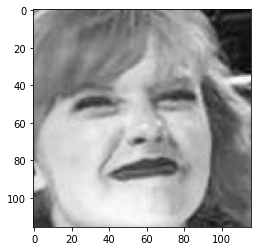

Taylor Swift


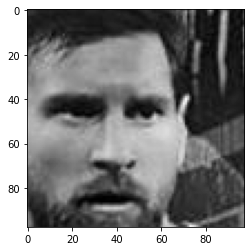

Lionel Messi


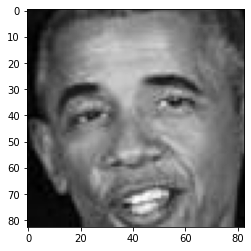

Zendaya


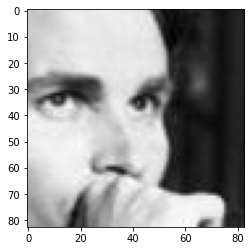

Jennifer Lawrence


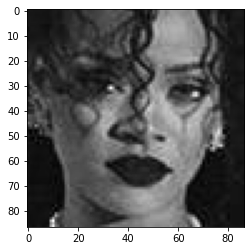

Chris Hemsworth


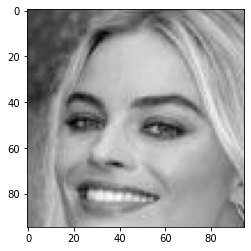

Jennifer Lawrence


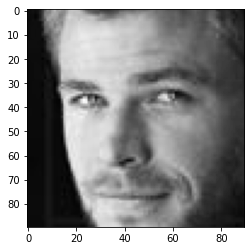

Adriana Lima


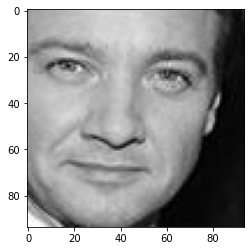

margot robbie


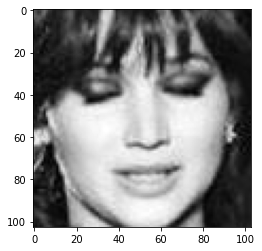

Adriana Lima


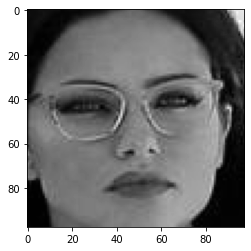

Selena Gomez


In [112]:
#TESTING ON THE COLLAGE OF IMAGES
for i in range(len(faces_rect)):
    test_img=img[faces_rect[i][0]:faces_rect[i][0]+faces_rect[i][2],faces_rect[i][1]:faces_rect[i][1]+faces_rect[i][3]]
    test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
    plt.imshow(test_img,cmap='gray')
    plt.show()
    test_img= cv2.resize(test_img, (image_width, image_length))
    test_img = test_img.reshape(total_pixels,1 )
    test_normalized_face_vector = test_img - avg_face_vector
    test_weight = np.transpose(test_normalized_face_vector).dot(np.transpose(eigen_faces))
    index =  np.argmin(np.linalg.norm(test_weight - weights, axis=1))
    print(full_data[index].split("_")[0])